# Investigation of Carbon-Dioxide Footprints of Different Food Groups #

In [156]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_excel('food_data_simple.xlsx')

In [162]:
# preliminary exploration of data #1

df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   FOOD COMMODITY GROUP                              324 non-null    object 
 1   Food commodity ITEM                               324 non-null    object 
 2   Carbon Footprint kg CO2eq/kg or l of food ITEM    324 non-null    float64
 3   Food commodity TYPOLOGY                           324 non-null    object 
 4   Carbon Footprint g CO2eq/g o cc of food TYPOLOGY  324 non-null    float64
dtypes: float64(2), object(3)
memory usage: 12.8+ KB


,Carbon Footprint kg CO2eq/kg or l of food ITEM,Carbon Footprint g CO2eq/g o cc of food TYPOLOGY
count,324.000000,324.000000
mean,3.098539,2.858299
std,5.758602,5.292955
min,0.109000,0.270000
25%,0.598750,0.565000
50%,1.376000,1.437000
75%,3.200000,3.880596
max,78.800175,78.800000


In [161]:
# preliminary exploration of data ctn'd

df["FOOD COMMODITY GROUP"].value_counts()

CROPS                     117
AGRICULTURAL PROCESSED    100
FISHING                    61
ANIMAL HUSBANDRY           46
Name: FOOD COMMODITY GROUP, dtype: int64

## CO<sub>2</sub> Footprint by Food Commodity Categories ##

Now we get the mean for each food commodity group and visualise potential trends:

Text(0, 0.5, 'CO2 Footprint [kg Co2/eq kg]')

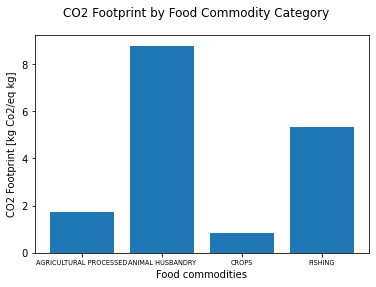

In [151]:
df.rename(columns ={'Carbon Footprint kg CO2eq/kg or l of food ITEM': 'CO2_FP_item'}, inplace=True)
commodity_group_means = df.groupby("FOOD COMMODITY GROUP").CO2_FP_item.mean().reset_index()

fig, ax = plt.subplots()
#plt.grid()
ax.bar(commodity_group_means.iloc[:,0], commodity_group_means.iloc[:,1], width=0.8)
fig.suptitle('CO2 Footprint by Food Commodity Category')
plt.rc('xtick', labelsize=6.6)
plt.xlabel('Food commodities')
plt.ylabel('CO2 Footprint [kg CO2/eq kg]')


**It can be seen that the 'ANIMAL HUSBANDRY' and 'FISHING' commodity categories have a higher mean CO<sub>2</sub> footprint when expressed in [kg CO2/eq kg].**

Further questions may be posed, such as:\
    - are these differences statistically significant? (particularly interesting when looking at 'ANIMAL HUSBANDRY' vs 'FISHING')\
    - is the mean an accurate statistic to describe the existing trends?\
    \
These questions will be investigated later on.

## CO<sub>2</sub> Footprint by Food Topology Categories ##

Now looking at CO<sub>2</sub> footprint per food typology (higher resolution than food commodity group):

Text(0, 0.5, 'CO2 Footprint [g Co2/eq g]')

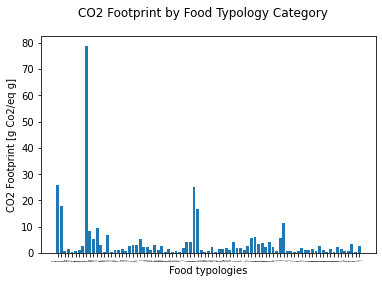

In [154]:
df.rename(columns ={'Carbon Footprint g CO2eq/g o cc of food TYPOLOGY': 'CO2_FP_typology'}, inplace=True)
typology_means = df.groupby("Food commodity TYPOLOGY").CO2_FP_typology.mean().reset_index()

fig, ax = plt.subplots()
#plt.grid()
ax.bar(typology_means.iloc[:,0], typology_means.iloc[:,1], width=0.8)
fig.suptitle('CO2 Footprint by Food Typology Category')
plt.rc('xtick', labelsize=0.00000001)
plt.xlabel('Food typologies')
plt.ylabel('CO2 Footprint [g Co2/eq g]')

From this it can be seen that there exist certain topologies which have an outstandingly high CO<sub>2</sub> footprint. These will be investigated further.